# GA Data Science 19 (DAT19) - Class 5
## Developing Mastery of Pandas, Numpy & Bokeh
####  

Justin Breucop (with parts from Craig Sakuma)

## Lab goals

- NumPy: Entering the Matrix
- Pandas: DataFrames as Bamboo
- Bokeh: Picture-Perfect Visuals

##NumPy
As we've seen in lecture, linear algebra is the branch of mathematics describing navigation between different vector spaces. This core concept is very important as a big piece of data cleansing is converting data into various formats and certain algorithms require data to be in a specific shape.

NumPy is a package designed to be used in scientific computing, and specifically around building N-dimensional array objects.

###Creating an array

In [26]:
import numpy as np
a = np.arange(25).reshape(5,5)
# arange(n) is a function that creates a 1 row array of integers of length n 
# reshape(M,N) is a method converts a list to a matrix of size MxN
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

We can convert from lists to arrays. Note however unlike lists, elements of an array all have to be of the same datatype.

In [27]:
alist = [[ 0,  1,  2,  3,  4],[ 5,  6,  7,  8,  9],[10, 11, 12, 13, 14],[15, 16, 17, 18, 19],[20, 21, 22, 23, 24]]
type(alist)

list

In [28]:
np.array(alist)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [29]:
biga = a*10
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [30]:
print biga.mean()
print biga.mean(0) #Average per column
print biga.mean(1) #average per row
# type(biga.mean(1))

120.0
[ 100.  110.  120.  130.  140.]
[  20.   70.  120.  170.  220.]


In [31]:
bigm = np.matrix(biga-20) #set as matrix then subtract
bigm

matrix([[-20, -10,   0,  10,  20],
        [ 30,  40,  50,  60,  70],
        [ 80,  90, 100, 110, 120],
        [130, 140, 150, 160, 170],
        [180, 190, 200, 210, 220]])

In [32]:
np.linalg.inv(biga-20) #inverse of the above

array([[ -2.81474977e+13,  -1.52777778e-03,   5.62949953e+13,
         -2.22222222e-02,  -2.81474977e+13],
       [  3.51843721e+13,   2.25000000e-02,  -5.27765581e+13,
         -3.51843721e+13,   5.27765581e+13],
       [ -4.22212465e+13,   9.38249922e+13,  -7.97512434e+13,
          4.69124961e+13,  -1.87649984e+13],
       [  9.14793674e+13,  -1.87649984e+14,   9.26521798e+13,
          1.17281240e+13,  -8.20968682e+12],
       [ -5.62949953e+13,   9.38249922e+13,  -1.64193736e+13,
         -2.34562481e+13,   2.34562481e+12]])

####Slices

In [33]:
bigm = np.array(bigm)
print bigm
print bigm[0]

[[-20 -10   0  10  20]
 [ 30  40  50  60  70]
 [ 80  90 100 110 120]
 [130 140 150 160 170]
 [180 190 200 210 220]]
[-20 -10   0  10  20]


In [34]:
#Same thing, but demonstrating the full slice with a colon
biga[0,:]
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [35]:
biga[:,3] #retrieve the 4th column

array([ 30,  80, 130, 180, 230])

Slice rules work for even more complex dimensional data

In [36]:
compa = np.arange(30).reshape(5,3,2)
compa

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [37]:
# lets describe it
print compa.shape
print compa.ndim
print compa.dtype

(5, 3, 2)
3
int64


In [38]:
compa[3,:,1] #3rd row, all second column, 1st row of 

array([19, 21, 23])

In [39]:
compa[0,0,0]

0

In [40]:
compa[0,0,0] = 5.9
compa[0,0,0]

5

Numpy tries to resolve conflicting datatypes, sometimes to our dismay

In [41]:
compa = compa.astype(float)
compa[0,0,0] = 5.75
compa[0,0,0]
compa

array([[[  5.75,   1.  ],
        [  2.  ,   3.  ],
        [  4.  ,   5.  ]],

       [[  6.  ,   7.  ],
        [  8.  ,   9.  ],
        [ 10.  ,  11.  ]],

       [[ 12.  ,  13.  ],
        [ 14.  ,  15.  ],
        [ 16.  ,  17.  ]],

       [[ 18.  ,  19.  ],
        [ 20.  ,  21.  ],
        [ 22.  ,  23.  ]],

       [[ 24.  ,  25.  ],
        [ 26.  ,  27.  ],
        [ 28.  ,  29.  ]]])

####Random Numbers
Random numbers are very helpful and are necessary at times for testing data pipelines and running statistical analyses. Functions for creating random values are under numpy.random.

In [42]:
#Create a randomized array
rm = np.random.rand(5,5) #random number between 0 and 1
rd = np.random.normal(0,10,50)
rm


array([[ 0.61025275,  0.86269322,  0.88204982,  0.87130146,  0.83266205],
       [ 0.05360706,  0.17785168,  0.89499768,  0.9185818 ,  0.36755699],
       [ 0.62876981,  0.4487912 ,  0.64131282,  0.96778125,  0.34855586],
       [ 0.97800558,  0.29175451,  0.53064451,  0.5623066 ,  0.0375611 ],
       [ 0.65001617,  0.75580553,  0.17827456,  0.91697838,  0.9376818 ]])

In [43]:
rm.shape

(5, 5)

In [44]:
print rm.mean()
print rm.mean(0) #Average per column
print rm.mean(1) #average per row

0.613831767796
[ 0.58413027  0.50737923  0.62545588  0.8473899   0.50480356]
[ 0.81179186  0.48251904  0.60704219  0.48005446  0.68775129]


In [45]:
# for a different Normal Distribution, use np.random.normal
rm = np.random.normal(5,10,(30,30))
rm

array([[ -2.27892381e+00,  -7.06488065e+00,   7.47250923e+00,
          1.02332218e+00,   9.01653620e+00,  -3.68374988e+00,
         -2.65530015e+00,   7.52046308e+00,   2.60216190e+01,
          1.80207079e+01,  -9.14767006e+00,  -1.03507382e+01,
          2.10567923e+00,  -1.88816193e+00,  -1.13012794e+01,
         -8.20317734e-01,   5.13242699e+00,   1.72549033e+00,
         -4.89166298e-01,   6.24338451e+00,   6.65529732e+00,
         -1.25725045e+01,   1.01979042e+01,   1.81487345e+01,
         -4.69005179e+00,   7.55519902e+00,   5.28769869e+00,
          7.28636834e+00,  -4.88206435e-01,   1.73090042e+01],
       [  1.34733119e+01,  -1.12539557e+01,   8.38460270e+00,
          3.79704192e+00,   2.76036484e+00,   4.75483849e+00,
         -5.73722082e+00,  -1.15266099e+01,  -3.62981843e+00,
         -6.94437660e+00,  -1.88200601e+00,  -9.49263015e+00,
         -2.37276311e+00,   1.66861242e+01,   2.71296529e+00,
         -1.02085687e+00,   4.79593298e+00,   8.47695244e+00,
       

In [46]:
print rm.mean(), "which is hopefully close to the input mean"
print rm.var(), "which variance = stdev squared"
print np.median(rm)

4.96716427193 which is hopefully close to the input mean
109.770883835 which variance = stdev squared
4.52008854486


Find more distributions and random functions here: http://docs.scipy.org/doc/numpy/reference/routines.random.html

###Exercise 1
1) Create a 4x5 array of integers numbering 0 to 19.

In [47]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

2) Create a 50x500 array with a mean of 20 and variance of 100. Save it to a variable called  `biggie`

In [48]:
biggie = np.random.normal(20,10,(50,500))
print biggie.shape
print biggie.mean()
print biggie.var()

(50, 500)
19.9354002232
99.9909153542


3) Change the mean of the array to a value within 1 of 0 and the variance within 1 of 25. Think about what the mean and the variance represent and try using various mathematical operations.

In [49]:
morph = (biggie - 20)/2
print morph.mean()
print morph.var()

-0.0322998883906
24.9977288385


##Pandas: DataFrames as Bamboo
You've already been exposed to dataframes in the previous labs so lets get into dataframes and how we can work with them.

In [82]:
import pandas as pd

data = pd.read_csv("../../data/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [83]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
data[data.Age>65]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [86]:
data[data.Age > 65][['Name','Age']] #columns in double brackets

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
96,"Goldschmidt, Mr. George B",71.0
116,"Connors, Mr. Patrick",70.5
493,"Artagaveytia, Mr. Ramon",71.0
630,"Barkworth, Mr. Algernon Henry Wilson",80.0
672,"Mitchell, Mr. Henry Michael",70.0
745,"Crosby, Capt. Edward Gifford",70.0
851,"Svensson, Mr. Johan",74.0


In [87]:
data[(data.Age==11)&(data.SibSp==5)] #logical and

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,NaN,S


In [ ]:
data[(data.Age==11)|(data.SibSp==5)] #logical or

###Cleaning Data

In [ ]:
data.info()

####Working with nulls
Exclude data

In [51]:
# data[data.Age.isnull()]
data[data.Age.notnull()]

NameError: name 'data' is not defined

In [52]:
# You can also just replace the nulls
data.Age[data.Age.isnull()].fillna(0)

NameError: name 'data' is not defined

In [53]:
#Replace with the mean to preserve statistical values
avg_age = data.Age[data.Age.notnull()].mean()
print avg_age
data.Age.fillna(avg_age)

NameError: name 'data' is not defined

####Replace with random normal distribution

In [54]:
# Get values of mean and standard deviation
data.Age[data.Age.notnull()].describe()

NameError: name 'data' is not defined

In [55]:
# Replace null values with 
data.Age.fillna(np.random.normal(29.7,14.5),inplace=True)

NameError: name 'data' is not defined

In [56]:
data.Age.fillna(np.random.normal(29.7,14.5)).describe()

NameError: name 'data' is not defined

###Convert categorical data to numerical

In [57]:
data.Sex=='female'

NameError: name 'data' is not defined

In [58]:
data.rename(columns={'Sex':'Is Female'},inplace=True)
data['Is Female']=data['Is Female']=='female'
data.head()

NameError: name 'data' is not defined

In [59]:
# get unique values of Embarked
data.Embarked.unique()

NameError: name 'data' is not defined

In [60]:
# replace values with numbers
data.Embarked.replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
data.head()

NameError: name 'data' is not defined

###Selecting with .loc, .iloc, & .ix

Selecting data in pandas can be tricky. The main takeaway is that .loc looks for index labels, .iloc looks for the integer index position, and .ix can be a mix. 

In [61]:
df = pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=list('ABCD'))
df

,A,B,C,D
a,1.277596,0.540664,1.594735,0.820566
b,-0.378391,-0.291681,0.812301,-2.001798
c,1.017851,-1.580553,-1.302196,0.486248
d,1.104780,1.617838,-0.325303,0.342805
e,0.067690,0.308841,1.209968,0.950485
f,1.839195,-1.030905,-0.028031,0.331107


In [62]:
df.loc['f']

A    1.839195
B   -1.030905
C   -0.028031
D    0.331107
Name: f, dtype: float64

In [63]:
df.iloc[len(df.index)-1]

A    1.839195
B   -1.030905
C   -0.028031
D    0.331107
Name: f, dtype: float64

In [64]:
df.A.ix['f'] == df.A.ix[-1]

True

In [65]:
cc = list('cookies')
cc[-4]

'k'

###Group by

In [66]:
# Find average age of passengers that survived vs. died
titanic_stats = data.groupby(['Survived','Pclass'])['Age'].mean() #add brackets for specifying multiple columns
titanic_stats.sort_values() #sort
titanic_stats


NameError: name 'data' is not defined

In [67]:
# Count number of female passengers
data.groupby('Is Female')['PassengerId'].count()

NameError: name 'data' is not defined

In [68]:
data.groupby(['Survived','Pclass'])['PassengerId'].count()

NameError: name 'data' is not defined

###Apply

In [69]:


# Convert ticket prices to USD
data.Fare.apply(lambda x: x*1.6)

NameError: name 'data' is not defined

In [70]:
data.Name

NameError: name 'data' is not defined

In [71]:
data.Name.apply(lambda x: x.split(",")[0])

NameError: name 'data' is not defined

###Concatenate

In [72]:
data_first_half = data.iloc[0:10,:]
data_first_half.info()

NameError: name 'data' is not defined

In [ ]:
data_second_half = data.iloc[10:,:]

remake_data = pd.concat([data_first_half,data_second_half])
remake_data.info()

###EXERCISE 2
1) Replace Pclass numbers with 'First Class', 'Second Class', 'Third Class'

2) What was the average ticket price for survivors vs. dead passengers?

###Bonus!!!
Round all ages to the nearest year using `apply`

##Bokeh: Picture Perfect Visuals

To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.


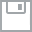
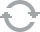
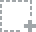
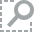
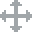
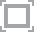
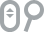
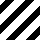
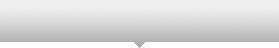
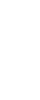
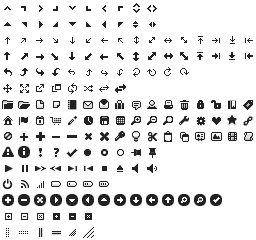
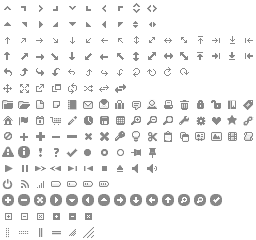
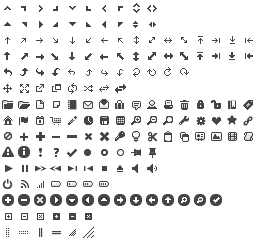
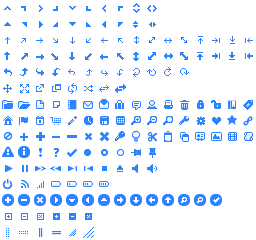
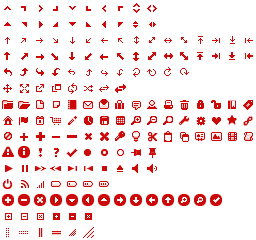
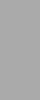
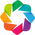
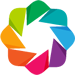

In [73]:
from bokeh.plotting import figure, output_notebook,show,vplot
output_notebook()

In [74]:
import pandas.io.data
import datetime
fb = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))


/Users/bhambre/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [75]:
# prepare some data
x = fb.Low
y = fb.High

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# These are glyphs
p.circle(x, y,size=30,alpha=.5,) #alpha: opacity

p.line(x,x*y.mean()/x.mean()) #takes several points and creates a line

# show the results
show(p)

At its core, Bokeh is built up with Plots and Glyphs. Plots are created with the figure keyword and then glyphs are visuals that are added to the visualization. The visuals are scalable, interactive and savable. You can even create vectorized colors.

In [76]:
fb.High

Date
2015-04-01    82.720001
2015-04-02    82.559998
2015-04-06    82.809998
2015-04-07    83.419998
2015-04-08    83.099998
2015-04-09    82.800003
2015-04-10    82.610001
2015-04-13    83.940002
2015-04-14    83.690002
2015-04-15    83.660004
2015-04-16    83.070000
2015-04-17    82.110001
2015-04-20    83.150002
2015-04-21    84.489998
2015-04-22    84.739998
2015-04-23    85.589996
2015-04-24    82.940002
2015-04-27    82.930000
2015-04-28    81.900002
Name: High, dtype: float64

In [77]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [78]:
p1 = figure(title="Titanic Ages Dead",x_axis_label = 'Age',y_axis_label = 'Count')
#construct the histogram
hist, edges = np.histogram(data.Age[data.Survived==0].values, density=True, bins=50)
#Construct your x axis
x = np.linspace(data.Age.min(),data.Age.max(),100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')

p2 = figure(title="Titanic Ages Survived",x_axis_label = 'Age',y_axis_label = 'Count')

hist, edges = np.histogram(data.Age[data.Survived==1].values, density=True, bins=50)
x = np.linspace(data.Age.min(),data.Age.max(),100)
p2.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')


show(vplot(p1,p2))

NameError: name 'data' is not defined

In [ ]:
%matplotlib inline
data.Age.hist()

/Users/bhambre/Desktop/GeneralAssembly/dat_sf_19/Homework/class 5


/Users/bhambre/Desktop/GeneralAssembly/dat_sf_19/Homework/class 5
